c:\anaconda\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


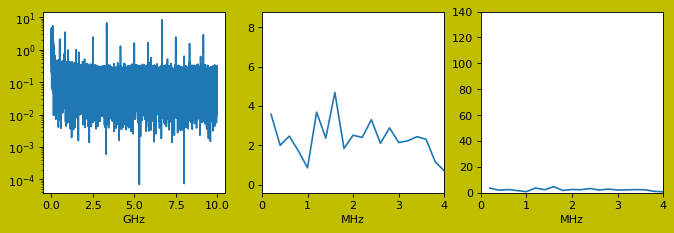

In [3]:
# This is for HF TC parameter caluclation
__Author__='Sung Chung'
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import math
from scipy.fftpack import fft
import glob


%matplotlib inline

############### need to provide below info  #####################
Fs=20e+9       #sampling rate  30GS/s
directory= "C:\Users\chung_su\Box Sync\__temp\Spyglass-selected"     #directory in your csv file located
filename='EKY6_H3-4'                                                 # your scope data name(csv file) 
#####################################

   
csvNames=glob.glob(directory + '//'+"*.csv")

filepath=directory+"\\"+filename+".csv"
#____________________________________
DataFile=filename + "_DataTable.csv"
sumName=filename + "_Summary.csv"
figureName=filename+'_pic.png'

sumf=directory+"\\"+sumName
dataf=directory+"\\"+DataFile
picf=directory+'\\'+figureName

df= pd.read_csv(filepath,skiprows=4)

y=np.array(df['Ampl'])
N=np.float(y.size)     #N=40002

T=(1.0/Fs)

yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)         # up to 10GHz (half of 20GHz sampling rate)
xf=xf/(1*1e6)        #   MHz

yhalf=int (N/2)                                #to match xf length   
xL= int (N*0.0002)
yf2=abs(yf[0:yhalf])

sumdf=pd.DataFrame({'freq_MHz':xf,
                   'Amp':yf2,})

sumdf.to_csv(dataf)

sumdf.head()

plt.figure(figsize=(10, 3), dpi= 80, facecolor='y', edgecolor='k')
plt.title('filename')

plt.subplot(1,3,1)
xfG=xf/(1*1e3)
plt.plot(xfG[1:],yf2[1:])
plt.yscale('log')
plt.xlabel('GHz')

plt.subplot(1,3,2)
plt.plot(xf[1:],yf2[1:])
plt.xlim([xf[0], xf[xL]])
plt.xlabel('MHz')

plt.subplot(1,3,3)
plt.plot(xf[1:],yf2[1:])
plt.xlim([xf[0], xf[xL]])
plt.ylim([0, 140])
plt.xlabel('MHz')

plt.show()
plt.savefig(picf)
